In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.79056884, -0.65291313, -1.08153165,  1.47790263,  1.59393922,
         0.15364616, -0.50966212, -0.32653581,  0.58714829, -0.89031426],
       [-0.18438773,  0.24542343,  0.9394752 , -1.03839393, -1.04840596,
         0.82966735,  0.53410212,  0.48712858, -0.14558925, -0.5570738 ]])

In [4]:
test_Features[:2]

array([[-0.76953907, -0.72076601, -1.05529306,  1.42867074,  1.40843211,
         0.4685749 ,  0.02102708,  0.10158376,  0.55771865, -1.70521918],
       [-0.77106396, -0.61474589, -0.95287788,  1.52002325,  1.93328149,
         0.32410616,  0.17385819, -0.47546346,  0.58067393, -0.10627653]])

In [5]:
train_Label[:4]

array([0, 1, 0, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([0, 1, 1, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=20*9,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=20*8, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=20*7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=20*6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=20*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=20*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=20*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=20*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [19]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 180)               1980      
_________________________________________________________________
dense_2 (Dense)              (None, 160)               28960     
_________________________________________________________________
dense_3 (Dense)              (None, 140)               22540     
_________________________________________________________________
dense_4 (Dense)              (None, 120)               16920     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_6 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_7 (Dense)              (None, 60)                4860      
__________

In [21]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [22]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 4s - loss: 0.6890 - acc: 0.6423 - val_loss: 0.6816 - val_acc: 0.6340
Epoch 2/30
 - 1s - loss: 0.5636 - acc: 0.6518 - val_loss: 0.5158 - val_acc: 0.6340
Epoch 3/30
 - 1s - loss: 0.4737 - acc: 0.6837 - val_loss: 0.4851 - val_acc: 0.8180
Epoch 4/30
 - 1s - loss: 0.3931 - acc: 0.8437 - val_loss: 0.3681 - val_acc: 0.8528
Epoch 5/30
 - 1s - loss: 0.3449 - acc: 0.8577 - val_loss: 0.3675 - val_acc: 0.8476
Epoch 6/30
 - 1s - loss: 0.3283 - acc: 0.8653 - val_loss: 0.3615 - val_acc: 0.8535
Epoch 7/30
 - 0s - loss: 0.3223 - acc: 0.8686 - val_loss: 0.3388 - val_acc: 0.8647
Epoch 8/30
 - 1s - loss: 0.3155 - acc: 0.8702 - val_loss: 0.3457 - val_acc: 0.8587
Epoch 9/30
 - 1s - loss: 0.3114 - acc: 0.8703 - val_loss: 0.3374 - val_acc: 0.8607
Epoch 10/30
 - 1s - loss: 0.3078 - acc: 0.8729 - val_loss: 0.3272 - val_acc: 0.8739
Epoch 11/30
 - 1s - loss: 0.3059 - acc: 0.8729 - val_loss: 0.3255 - val_acc: 0.8673
Epoch 12/30
 - 1s - loss: 0.3015 - a

In [23]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

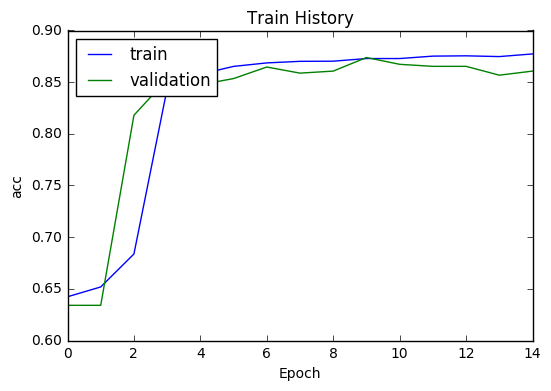

In [24]:
show_train_history(train_history,'acc','val_acc')

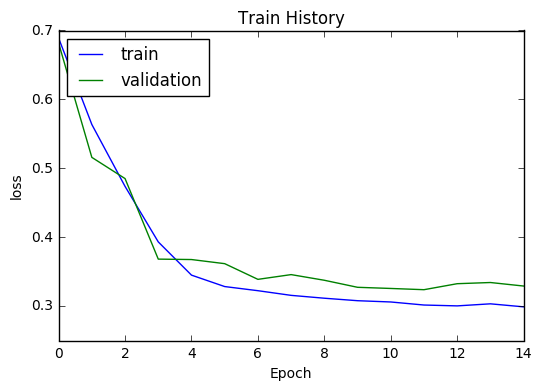

In [25]:
show_train_history(train_history,'loss','val_loss')

In [26]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 109us/step


In [27]:
scores[1]

0.8727655098641333